### AB-testing and the Multi-Armed Bayesian Bandit

##### We can treat the data as if we are given three slot machines (A, B, C) with their success rates. 
- We want to use exploration-exploitation to find out which slot machine we should choose to maximize our earnings.
- We start with some prior beliefs about the success probabilities of the slot machines, we assume they follow a Beta distribution with params $\alpha_{prior}$ and $\beta_{prior}$
- We play each slot machine (allowing us to explore) and observe if we win or lose (bernoulli trial) and then we update the parameters of the prior distribution with these results. We call this $\alpha_{posterior}$ and $\beta_{posterior}$
- We assume the parameters $\alpha_{prior}$ and $\beta_{prior}$ to be 1, mimicking a uniform distribution. We then choose the max value sampled as this allows us to exploit games with higher success rates while exploring potentially better options
- The new prior for the next game is the calculated posterior, and we continue to update our prior with more and more observations
- Eventually, we should see convergence of the bandits

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [263]:

# Number of bandits (choices)
num_bandits = 3

# True probabilities of success for each bandit 
# Corresponds to [theta_a, theta_b, theta_c]
success_probs = [0.9, 0.7, 0.5] 

# Number of simulations
n_sims = 150

# Initialize priors as a beta distribution
# Assume alpha = 1, beta = 1 such that Beta ~ (1, 1)
# These priors will be updated at every simulation
alpha_prior = [1] * num_bandits 
beta_prior = [1] * num_bandits 

# Create simulations
results = np.zeros((n_sims, num_bandits)) # (n_sims x 3) matrix

for sim in range(n_sims):
    # Draw 3 samples from the priors to get the current estimates of success probabilities
    sample_probs = [np.random.beta(a, b) for a, b in zip(alpha_prior, beta_prior)]

    # Choose the bandit with the highest sampled probability
    chosen_bandit = np.argmax(sample_probs)

    # Simulate a Bernoulli trial
    success = stats.bernoulli.rvs(success_probs[chosen_bandit])

    # Update the posterior, 
    # alpha --> success whereas beta --> failure
    alpha_posterior = alpha_prior[chosen_bandit] + success 
    beta_posterior = beta_prior[chosen_bandit] + (1 - success)

    results[sim, chosen_bandit] = success

    # Update the prior using the calculated posterior
    alpha_prior[chosen_bandit] = alpha_posterior
    beta_prior[chosen_bandit] = beta_posterior



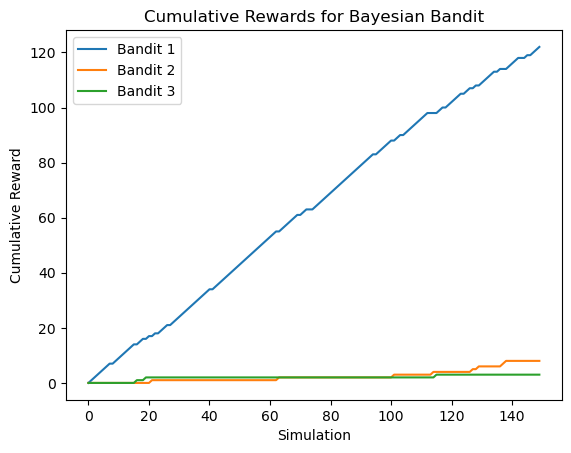

In [264]:
# Plot rewards of each bandit, i.e. the number of successes

cumulative_rewards = np.cumsum(results, axis=0)
for bandit in range(num_bandits):
    plt.plot(cumulative_rewards[:, bandit], label=f'Bandit {bandit + 1}')

plt.title('Cumulative Rewards for Bayesian Bandit')
plt.xlabel('Simulation')
plt.ylabel('Cumulative Reward')
plt.legend()

### Final Posterior Distribution Plots for Each Bandit
- This section just serves as visual aid for the final posteriors after all simulations have elapsed
- We should see a 'peak' in the posterior for the bandit with the highest probability

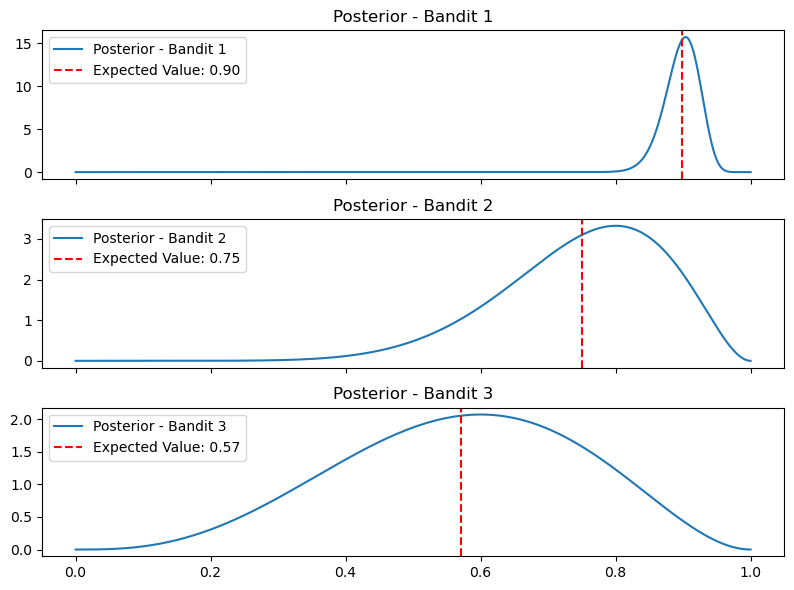

In [265]:
fig, axs = plt.subplots(num_bandits, 1, figsize=(8, 2 * num_bandits), sharex=True)

# Plot posterior distributions and expected values
x_values = np.linspace(0, 1, 1000)
for i in range(num_bandits):
    posterior_pdf = stats.beta(alpha_prior[i], beta_prior[i]).pdf(x_values)
    
    # Plot posterior distribution
    axs[i].plot(x_values, posterior_pdf, label=f'Posterior - Bandit {i + 1}')
    
    # plot the expected value - they should be somewhat be close to the true probabilities
    expected_value = alpha_prior[i] / (alpha_prior[i] + beta_prior[i])
    axs[i].axvline(expected_value, color='red', linestyle='--', label=f'Expected Value: {expected_value:.2f}')

    axs[i].set_title(f'Posterior - Bandit {i + 1}')
    axs[i].legend()

plt.tight_layout()

